In [50]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('u.data',sep='\t')

In [51]:
df.head()

,196,242,3,881250949
0,186,302,3,891717742
1,22,377,1,878887116
2,244,51,2,880606923
3,166,346,1,886397596
4,298,474,4,884182806


In [52]:
df.shape

(99999, 4)

In [53]:
column=['user_id','item_id','rating','timestamp']

In [54]:
df=pd.read_csv('u.data',sep='\t',names=column)
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [55]:
df['user_id'].nunique()

943

In [56]:
df2=pd.read_csv('u.item',sep='\|',header=None)
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [57]:
df2.shape

(1682, 24)

#just extracting the name of the movies and the item_id from this dataset

In [58]:
df2=df2.iloc[:,0:2]
df2.head()

,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [59]:
df2.columns=['item_id','movie_title']

In [60]:
df2.head()

,item_id,movie_title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [61]:
df3=pd.merge(df,df2,on='item_id')
df3.tail()

,user_id,item_id,rating,timestamp,movie_title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


#EXPLORATORY DATA  ANALYSIS

In [62]:
df3.groupby('movie_title')['rating'].mean().sort_values(ascending=False)

movie_title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

##The movies which are getting 5 star may have only one rating , hence in order to make a good recomendation system , we need to consider the number of ratings

In [63]:
df3.groupby('movie_title')['rating'].count().sort_values(ascending=False)

movie_title
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [67]:
df4=pd.DataFrame(df3.groupby('movie_title')['rating'].mean())
df4.head()
df4=df4.rename(columns={'rating':'average rating'})

In [68]:
df4['no. of ratings']=pd.DataFrame(df3.groupby('movie_title')['rating'].count())

In [69]:
df4.head()

,average rating,no. of ratings
movie_title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


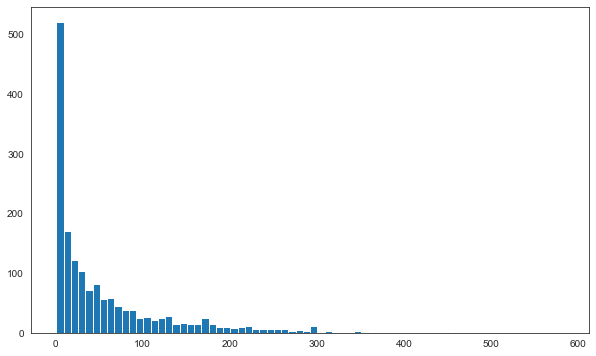

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
plt.figure(figsize=(10,6))
plt.hist(df4['no. of ratings'],bins=70)
plt.show()

#from this we can set a threshold to consider only those movies who have no of ratings greater than 100

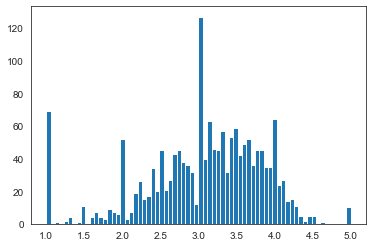

In [74]:
plt.hist(df4['average rating'],bins=70)
plt.show()

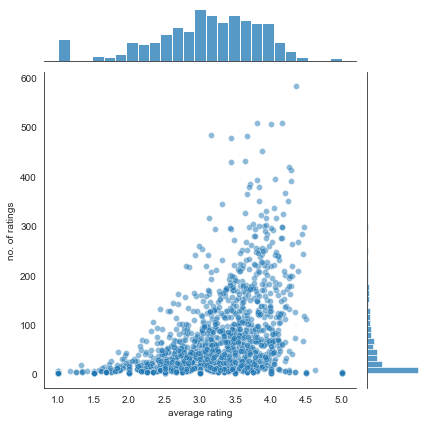

In [75]:
sns.jointplot(x='average rating',y='no. of ratings',data=df4,alpha=0.5)

In [70]:
df3=pd.merge(df3,df4,on='movie_title')
df3.head()

,user_id,item_id,rating,timestamp,movie_title,average rating,no. of ratings
0,196,242,3,881250949,Kolya (1996),3.991453,117
1,63,242,3,875747190,Kolya (1996),3.991453,117
2,226,242,5,883888671,Kolya (1996),3.991453,117
3,154,242,3,879138235,Kolya (1996),3.991453,117
4,306,242,5,876503793,Kolya (1996),3.991453,117


In [71]:
df3[df3['movie_title']=='Star Wars (1977)']

,user_id,item_id,rating,timestamp,movie_title,average rating,no. of ratings
50813,290,50,5,880473582,Star Wars (1977),4.358491,583
50814,79,50,4,891271545,Star Wars (1977),4.358491,583
50815,2,50,5,888552084,Star Wars (1977),4.358491,583
50816,8,50,5,879362124,Star Wars (1977),4.358491,583
50817,274,50,5,878944679,Star Wars (1977),4.358491,583
...,...,...,...,...,...,...,...
51391,749,50,5,878846978,Star Wars (1977),4.358491,583
51392,886,50,5,876031501,Star Wars (1977),4.358491,583
51393,739,50,4,886958895,Star Wars (1977),4.358491,583
51394,903,50,5,891031329,Star Wars (1977),4.358491,583


#creating movie recomendation

In [97]:
movie_matrix= df3.pivot_table(index='user_id',columns='movie_title',values='rating')
movie_matrix.head()

movie_title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


#suppose we have watched star wars (1977) and we want recomendation about other movies , we can do this by-


In [109]:
star_wars_rating=movie_matrix['Star Wars (1977)']
star_wars_rating.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [110]:
similar_to_star=movie_matrix.corrwith(star_wars_rating)

In [113]:
corr_star=pd.DataFrame(similar_to_star,columns=['correlation'])

In [114]:
corr_star

,correlation
movie_title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


In [115]:
corr_star.dropna(inplace=True)

In [116]:
corr_star

,correlation
movie_title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


##using the threshold we got from data visualization from cell 72

In [118]:
df4.head()

,average rating,no. of ratings
movie_title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [123]:
corr_star=corr_star.join(df4['no. of ratings'])

In [124]:
corr_star

,correlation,no. of ratings
movie_title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns (1988),0.186377,101
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41


In [127]:
corr_star[corr_star['no. of ratings']>100].sort_values('correlation',ascending=False)

,correlation,no. of ratings
movie_title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


##AS WE CAN SEE THE RECOMENDED MOVIES WE ARE GETTING IS EMPIRE STRIKES BACK(1980),RETURN OF THE JEDI(1983) WHICH ARE BASICALLY THE NEXT PARTS OF THIS SERIES

#NOW TO GENERALISE THIS WE WILL MAKE A FUNCTION WHICH WILL ACCEPT A MOVIE NAME AND WILL RECOMMEND MOVIES ACCORDINGLY

In [139]:
def predict_movies(movie_name):
    movie_name_rating=movie_matrix[movie_name]
    similar_movie=movie_matrix.corrwith(movie_name_rating)
    corr_movie=pd.DataFrame(similar_movie,columns=['correlation'])
    corr_movie.dropna(inplace=True)
    corr_movie=corr_movie.join(df4['no. of ratings'])
    predictions=corr_movie[corr_movie['no. of ratings']>100].sort_values('correlation',ascending=False)
    return predictions

In [141]:
pred=predict_movies('Titanic (1997)')
pred.head()

,correlation,no. of ratings
movie_title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208


#ON SEARCHING River Wild ,The(1994) on net , it comes out to be very similar to titanic 